# KNN基础

> KNN,K-Nearest Neighbors 算法的中文名叫K近邻算法，KNN算法的思想非常简单，应用的数学知识简直没有，但是效果却出奇的好，接下来，来一起看看这个算法长什么样子

#### 图解
![title](img/isea1.png)

#### 算法思想

>这里肿瘤大小+时间都是特征，颜色是标签，如果新来了一个蓝色的肿瘤，我们如何判断该肿瘤是良性还是恶性？这里计算蓝色的点和所有的点的距离大小，然后排序，取出距离最近的K个点，最近的K个点的标签，进行投票，来决定新进来的肿瘤是良性还是恶性。


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
row_data_X = [[3.390902,2.339098],
              [3.110987,2.799093],
              [1.345243,3.455634],
              [3.434645,4.980835],
              [2.984534,2.385423],
              [6.923839,5.323263],
              [5.979824,5.504965],
              [8.098498,5.098667],
              [7.892098,0.983723],
              [9.084339,5.987982]
             ]
row_data_y = [0,0,0,0,0,1,1,1,1,1]

In [19]:
X_train = np.array(row_data_X)
y_train = np.array(row_data_y)

In [20]:
X_train

array([[3.390902, 2.339098],
       [3.110987, 2.799093],
       [1.345243, 3.455634],
       [3.434645, 4.980835],
       [2.984534, 2.385423],
       [6.923839, 5.323263],
       [5.979824, 5.504965],
       [8.098498, 5.098667],
       [7.892098, 0.983723],
       [9.084339, 5.987982]])

In [21]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

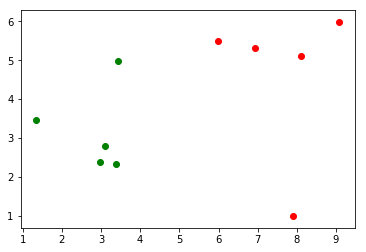

In [23]:
# 散点图的绘制
plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color = 'g')
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],color = 'r')
plt.show()

In [30]:
x = np.array([8.093,4.345])

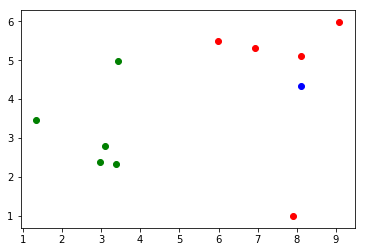

In [31]:

plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1],color = 'g')
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1],color = 'r')
plt.scatter(x[0],x[1],color = 'b')
plt.show()

### KNN的过程

使用 **欧拉距离** 作为距离的计算公式
![欧拉公式](img/isea2.png)

In [32]:
from math import sqrt
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)
distances

[5.112080636610498,
 5.216347571320186,
 6.806114634136351,
 4.701548410178289,
 5.4714136100358015,
 1.5244461096050592,
 2.4106081407398015,
 0.753687053685414,
 3.3672755581230653,
 1.9188910509054442]

In [33]:
# 或者直接使用python中的生成表达式来实现
distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
distances

[5.112080636610498,
 5.216347571320186,
 6.806114634136351,
 4.701548410178289,
 5.4714136100358015,
 1.5244461096050592,
 2.4106081407398015,
 0.753687053685414,
 3.3672755581230653,
 1.9188910509054442]

In [34]:
# argsort 对数组中的数据进行排序，但是返回的是排序结果的索引值
np.argsort(distances)

array([7, 5, 9, 6, 8, 3, 0, 1, 4, 2], dtype=int64)

In [35]:
nearest = np.argsort(distances)

In [36]:
k = 6
# 最近的K个点的y坐标
topK_y = [y_train[i] for i in nearest[:k]]

In [37]:
topK_y

[1, 1, 1, 1, 1, 0]

In [39]:
# 使用counter，来将数组中的元素和该元素出现的次数，做一个K,V映射
from collections import Counter
Counter(topK_y)

Counter({1: 5, 0: 1})

In [40]:
votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

In [44]:
votes.most_common(1)[0][0]

1

> 这里的结果是1，表示预测是恶性肿瘤

## 重新认识机器学习

#### 如下图：
![Machine Learning](img/isea3.png)

>一般而言，我们需要就训练数据集作为机器学习算法的输入，以此来训练处一个模型；然后我们在往这个模型中输入样例，就可以得到预测值。
fit：训练，拟合

但是KNN算法有一个特点是：KNN并不需要训练过程，有可以理解为模型不需要训练得到，训练数据集本身就是模型，sklearn这个机器学习库，就是如此封装KNN算法的。

### 使用scikit-learn中的KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier # 这个类中包装了KNN算法

In [60]:
# 获取KNN实例
kNN_classfier = KNeighborsClassifier(n_neighbors = 6)
kNN_classfier.fit(X_train,y_train) # fit方法有返回值，直接包含在KNN实例中


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [61]:
kNN_classfier.predict(x.reshape(1,-1))

array([1])

## 判断机器学习算法的性能
#### 如下示意图
![判断机器学习算法的性能](img/isea4.png)

>我们将数据集分成训练数据集和测试数据集，然后使用训练数据集去训练模型，使用测试数据集去测试我们训练出来的模型，以此来衡量我们机器学习算法的性能的好坏。

## 测试我们算法

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

In [64]:
X.shape

(150, 4)

In [65]:
y.shape

(150,)

### train_test_split

In [66]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

> 由于我们的数据中的标签是有规律的，所以我们需要对原始的数据进行一个shuffle打乱，这里的数据，特征和标签是一一对应的，但是特征和标签是分开的，此时我们随机化的时候，对索引进行随机

In [68]:
shuffle_index = np.random.permutation(len(X))
shuffle_index

array([ 55,  86,  56,  32,  17,  40,  68, 118, 141,  29,  44,  22, 125,
        90,  34, 139,  38,  88,  50, 108, 135, 145, 130, 126, 107,  77,
        35,  13,  20, 128, 115,  81,  26,  16,  42,  52,  49, 105, 146,
        74,  62,  31, 114,   8,  30, 112, 117,  89,  41,  82,  60,  91,
        65, 136,  14,  66, 104,  75, 137,  95,  39,  21, 111, 129,  73,
         0,  27,  15,  92,  69,  63, 142, 140,  79, 149,  11,  85, 148,
        97, 143, 138, 147,  19, 102,  80,  47,  87, 110,  12,   1,  78,
         6,  84,   9, 132,  24,  51,  70,  45,  61,  67, 100, 123, 134,
        64,  72, 113,   3,  83, 120,  99,  54,   2,  59,  33,  46,  98,
       119,  43,  48,  18,  94, 116,   5,   4, 133,  71,  10, 124,  53,
        37,  57, 101,  96,   7, 103,  58, 121,  76,  93,  36, 122, 144,
        25, 109, 127, 106,  23,  28, 131])

In [69]:
# 定义测试数据集的比例
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
test_size

30

In [72]:
test_indexs = shuffle_index[:test_size]
train_indexs = shuffle_index[test_size:]

In [73]:
X_train = X[train_indexs]
y_train = y[train_indexs]

X_test = X[test_indexs]
y_test = y[test_indexs]

In [75]:
X_train.shape

(120, 4)

In [76]:
y_train.shape

(120,)

### sklearn中的train_test_split

In [78]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2) #默认也是0.2

In [84]:
X_train.shape

(120, 4)

In [85]:
y_train.shape

(120,)

In [86]:
X_test.shape

(30, 4)

In [88]:
y_test.shape

(30,)